# 随机变量视角
1. 将价格、收益、因子、风险指标视为随机变量
1. 离散 / 连续随机变量的直觉区分
1. 样本与随机变量实现的关系

## 1.随机变量定义

**在概率论中,随机变量是一个可被测量的变量**

>随机变量不仅是把未来的结果映射到数值,更需要满足可测性
>
> 随机变量不是结果，而是“在不知道世界会如何实现之前，你约定好的一种记账方式”。

$$X: Ω→R$$

- 在交易里面
    1. Ω = 市场所有"可能运行的方式"(你永远看不到)
    2. 映射规则 = 你选择"用什么视角看市场"
    3. 数值 = 你最终能存进表格的一列
- Key point
    - 随机变量在事情发生之前就已经定义好了,不是事后才出现的.
    - 随机变量 ≠ 时间序列
        - 理论对象 : $R_{t+1}$
            - 一个固定时点,尚未发生的随机变量
        - 手里的数据 : ${R_1(ω_0),R_2(ω_0)....}$
            - 一条已实现的时间序列
        - 时间序列 ≠ 分布样本,除非额外假设
        - 错误分析是什么 ? = 你想要的是 $R_{t+1}$
            - 但是你做的是 = 历史平均 $R$
            - 这一步隐含了一个巨大的假设 = $时间平均 = 概率平均(遍历性)$
    - 条件信息才是随机变量的关键
        - 在交易中不存在 $R_{t+1}$
        - 我们所面对的是 $R_{t+1} | F_t$
            - 我已经知道了这些东西的前提下,未来还有多少不确定性
        - $F_t$的变化,不会改变世界已经发生的事情,但会改变你对未来的认知分布
        - 因子模型的本质不是来自预测未来,而是在不同的信息下,把未来收益的分布重新划分
        - 同一个数据,可以对应非常多的随机变量,这是建模自由度的真正来源
            - 你可以进行连续变量的建模 = $R_t$ 
            - 离散变量 = $Y_t = 1(R_t > 0)$ 
            - 极端变量 = $Zt​=1(Rt​<−5\%)$



```c
    对于任意实数集合 𝐵⊆𝑅 (B是R的一个子集)
    {ω:X(ω)∈B} 必须是可事件的,是对某个σ-代数 𝐹可测
        X = 随机变量,在所有可能世界ω中取值,然后使用B集合里面的范围对于X(ω)进行筛选
```

对于不是随机变量的例子是什么呢 ? 
- 假设你定义$Y = P_{t+1}(ω) + P_{t+2}(ω)$ 但你只取了某个不可观察的信息(比如未来的新闻影响..)来计算Y
    - 这种Y不是随机变量,因为在当前信息$F_t$下,它对应的事件集合可能不可测,无法用概率处理.
- 比如定义一个函数 $S(ω)= 1$,如果明天涨,-1,如果明天跌
    - 这个函数无法依赖你当下的信息观察到未来的事件,他就不是随机变量
- 如果定义 $Z=max(P_{t+1},P_{t+2}) - min(P_{t+1},P_{t+2})$
    - Z 是随机变量，但在 $𝐹_𝑡$ 下不可测，因此在 t 时刻无法被定价、预测或作为交易决策变量
---

$$P_t : Ω→R $$
本身是正确的,但是缺乏描述,需要更加注意**时间索引和信息集合**
- 函数$P_t$= 当下的价格(使用金融价格序列作为例子)
    - $P_t$是函数,函数输出一个实数$ P_t(ω) $ 这就是价格在该世界下的取值
- 时间索引t的作用
    - $P_t$展示的是当下的价格,而不是 $t+1,t+2...$
    - 不同时刻对应不同的随机变量 $P_{t+1},P_{t+2}.....$
- 信息集合$F_t$的作用
    - 你在t观察或预测的内容,必须建立在$F_t$(当前可被观测到的信息),而不是$F_{t+1}$ 未来信息

---
$$信息集合F_t$$

准确来说$F_t$是一个σ-代数
- σ-代数具有三个特质
    1. 包含全集 = $F_t$ = 所有你可以观察到的信息集合(相当于所有可能世界ω)
    2. 补集封闭 = 如果某事可被观测,那么对立事件也需要观测(相当于一个事情的另一面,open = close,可能=不可能)
    3. 可数并封闭 = 可观察到事件(1,2,3,4..),那么就可以观察到事件并集,1和2同时发生,2,3同时发生.....
- σ-代数保证
    1. $F_t$里的事件可量化概率计算.
    2. 可以构建不同的组合后,还可以用于量化概率计算

所以$F_t$它定义了"现在已知的信息",然后$P_t$是可测与$F_t$的随机变量.
- 给定$F_t$时,$P_t$的不确定性已经被"部分固定",剩下的随机性来自于未知信息.
- 严格意义来说是 **"对于可观测性的约束"**,而非简单的过滤信息.
---
$$历史价格序列是某条世界线的实现$$
这个本身是正确的,但是有需要注意的地方
- 虽然现在看已知道的结果可以推断出来一条已实现的历史路径
    - 但是在量化分析中,假设这些历史数据是来自某种隐含分布的样本.
        - 隐含分布是指：我们看不见、也不能直接观测，但假定在背后生成这些数据的概率分布
        - 交易的本质就是判断在当前信息下，市场定价所隐含的短期分布，是否系统性偏离了你认为合理的条件分布
    - 但是风险点在于,我们如果只是把历史的一条已实现路径当作确定的路径,而不是考虑它来自分布,那么策略回测的统计推断极有可能失效.

而在市场中，有些路径出现频率偏高可能不仅是随机，也可能是市场机制或结构性因素造成的

因此“历史只是单条路径”是对的，但对市场而言，路径出现的概率本身可能不是均匀的

我们能够控制的就是,风险管理来让继续走下去

---
#### 1.1.为什么建模收益率$R_{t+1}$ 而不是价格$P_t$

1. 价格是**累计结果** 
    - 价格本身包含了所有历史涨跌的累积效应，所以它的波动 受过去路径影响非常大，容易造成强相关和非平稳性
2. 收益率是 **“不确定性最小单元”**
    - 真正的随机性是“涨跌幅”，也就是你明天的收益率
    - 定义收益率 : 
        1. $R_{t+1} = \frac{P_{t+1} - P_t}{P_t}$ 这是普通的收益率计算
        2. $r_{t+1} = InP_{t+1} - InP_t$ 这是对数收益率的计算
    - 收益率是直接表达了,t+1 相比于 t 的变化,去掉了累计路径的干扰,更直接明确看到了变化和随机性
    - 因此,随机性集中在最小时间段的价格变动上,更加适合用于建模
    - 类比 = 你更加关心的是每天的天气变化,而非过去一年的温度累积图.
3. 收益率是近似独立的
    - 在很多模型中(如几何布朗运动GBM):
        - $R_{t+1}​相对独立于 R_t​,R_{t−1}​,…$
    - 而价格$P_t$显然不是独立的,它是过去收益率累积的结果.
    - 对概率建模来说,独立或弱相关的随机变量更容易分析,计算期望与方差
---
#### 1.2.真正关注的不是点值,而是条件期望和条件方差
1. 随机变量$R_{t+1}$的核心意义
    - $R_{t+1}是随机变量$
    - 明天可能涨,跌,或者不动
    - 幅度大小不确定
    - 极端情况不能忽略
2. 条件期望与条件方差
    - $\mathbb{E}[R_{t+1} \mid \mathcal{F}_t], \quad \mathrm{Var}(R_{t+1} \mid \mathcal{F}_t)$
        - 条件期望$\mathbb{E}[R_{t+1} \mid \mathcal{F}_t]$ 
            - 公式分析 : 
                - $R_{t+1}$ = 表示明天的收益率,核心是随机变量,未来的收益不确定.
                - $E[⋅]$ = 期望值,也就是平均值或预期.
                - $| F_t$ 
                    - | = 条件符号,表示在已知信息条件下.
                    - $F_t$是时间t可获得的全部信息
                - 也就是现在我们掌握的所有信息中,对于明天的预期值是多少.
            - 给定你当前掌握的市场信息$F_t$
            - 你对下一步平均收益率的最佳估计
            - 对应问题: 我是否有长期正收益优势?
        - 条件方差$\quad \mathrm{Var}({R_{t+1}} \mid \mathcal{F}_t)$
            - 公式分析 : 
                - $R_{t+1}$ = 表示明天的收益率,核心是随机变量,未来的收益不确定.
                - $Var[⋅]$ = 方差,也就是随机变量离它的平均值的波动幅度有多少.
                - $| F_t$ 
                    - | = 条件符号,表示在已知信息条件下.
                    - $F_t$是时间t可获得的全部信息
            - 在已知的信息下收益率的不确定
            - 对应问题: 为了获取这个优势,我要承担多大的风险?
> 核心: 量化交易不是预测明天价格是多少,而是在期望与方差之间权衡.
3. 量化决策公式化
    - 信号强度 = $\mathbb{E}[R_{t+1} \mid \mathcal{F}_t]$ 
    - 仓位大小 ≈ $\frac{\mathbb{E}[R_{t+1} \mid \mathcal{F}_t]}{\quad \mathrm{Var}({R_{t+1}} \mid \mathcal{F}_t)}$(类似马科维茨均值方差优化或Kelly公式)
        - 分子 = $\mathbb{E}[R_{t+1} \mid \mathcal{F}_t]$ 
            - 条件期望值,代表就是在已知的信息下,我对于下一个数据的期望预测
        - 分母 = $\quad \mathrm{Var}({R_{t+1}} \mid \mathcal{F}_t)$
            - 条件方差,代表预测收益的不确定性与风险.
        - 整体：分子越大（预期收益高）、分母越小（风险低），仓位应该越大；反之，仓位小
> 这就是为什么量化交易几乎所有模型都是“信号/风险比”而非“预测点值”




下图是收益率和累积收益率的对比图

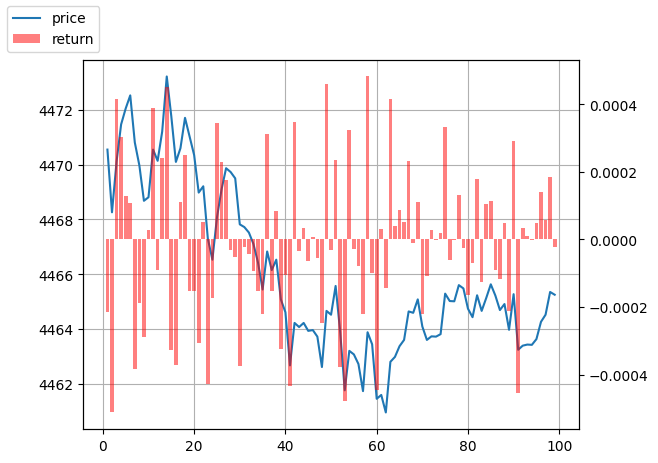
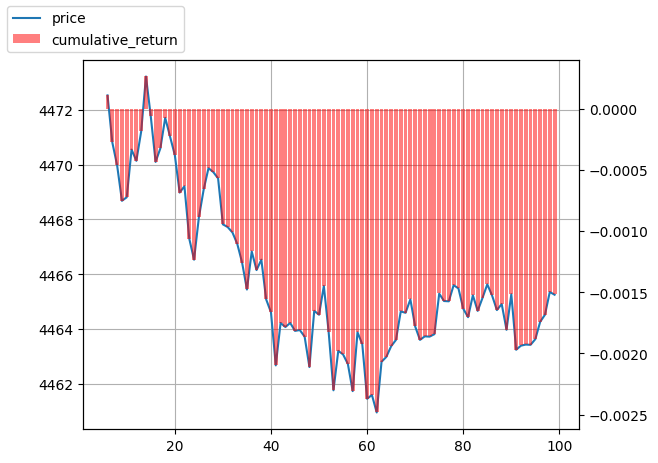

## 2.离散/连续随机变量定义

> 连续/离散的随机变量区别,不在于数据,也不在于是否是实数或者某个整数,而是在于
>
> 你认为市场在这一层面上，是“幅度不确定”，还是“状态不确定”。

---
### 2.1.连续随机变量——你在刻画“不确定性的大小”
连续变量在量化里代表了什么 ? 
> 把一个量建模为连续随机变量,等价于承认:
>
> 结果是有幅度的,不是非黑即白的事件.

$$R_{t+1}是连续随机变量$$
1. 市场结果不是对/错,而是"涨多少/跌多少"
2. 在经济和金融里，两个“数值上很接近”的结果，在现实含义上也应该“差不多
3. 单点概率没有意义,只能谈区间概率和密度
    - 不可能说某个人的身高是170.0001cm,应该说的是一个人的身材可能是在[160,172]

> 需要从博弈思维转变到了风险思维
>
> 因为你不可能精确捕捉到任何一个区间概率,你最多只能够做到在捕捉到概率区间放大盈利,在区间外缩小亏损.

$$f(r),F(r)=P(R≤r)$$
1. 密度$f(r)$
    - 收益率在r附近出现的"相对频率密度"
    - 也就是市场最常在哪些结果区间
        - 哪些收益区间是 **日常波动**.
        - 哪些区间是 **"不常见的,但是会发生的"**
1. 分布函数$F(r)=P(R≤r)$
    - 收益率小于等于(<=)r的累积概率
    - 亏损或收益达到某个水平的累计概率
    - VaR = $VaR_a = inf{r:F(r) ≥ a}$
    - ES = $ES_a = E[R | R ≤ VaR_a]$
    - 不关心你赚不赚钱,而是关系你可能亏损到多深

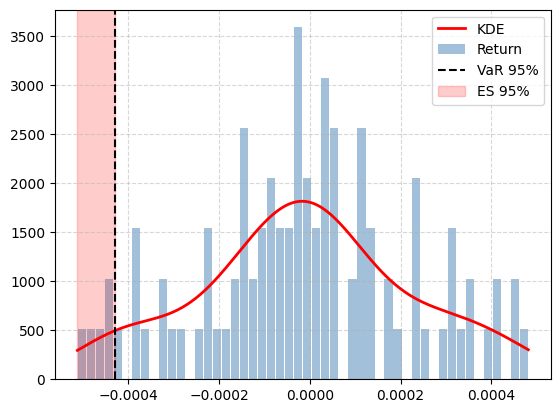

> **我不控制结果，只能管理分布**

连续随机变量意味着 : 
- 不能控制某个具体$R(ω_0)$
    - 能够改变暴露在哪一段分布上
    - 能改变对尾部的暴露程度
    - 改变你是否参与某些极端区间
- 而不是预测明天是涨还是跌.

--- 
### 2.2.离散随机变量——你在刻画“选择或状态”

> 离散随机变量在交易里，几乎从不直接描述市场，而是描述你与市场的交互方式

- 交易中的例子
    - 是否上涨 $Y_t ∈ {0,1}$
    - 是否开仓
    - 仓位状态: {-1,0,+1}
    - 是否触发止损

这类变量的核心不是 **"大小"** ,而是 **"发生"/"不发生"**

$$P(Y=1 | X)$$
- $𝑋$ 是你已知的信息
- $Y$ 是未来的离散状态(涨/跌,开仓/不开仓,止损/止盈..)
- 核心任务 = 用X去预测Y的概率

> 分类模型,本质上都是在刻画离散随机变量的条件分布.

---

### 2.3.常见问题(层级混淆)

- 抽象表达
    1. 收益是连续的 $R_{t+1} ∈ R$
        - 它通常输出的是涨跌幅度,波动大小等
    2. 策略的输出是离散的
        - 买卖,空仓平仓信号....
    3. 层级混淆
        - 多数人会把连续和离散的东西混乱使用起来,导致出现极大的风险.
            - 核心原则 **把连续预测和离散决策统一纳入模型训练和评估**
            - 连续是“信息”，离散是“决策”

---
### 2.4.随机变量在量化策略里面的模样

1. 第一层 = 连续随机变量 (世界对你的不确定性)
    - $R_{t+1} | F_t$
    - 在当下信息,未来收益可能长什么样子
        - 你需要做的就是(估计/对比)
            - 估计
                1. 均值(有没有优势)
                2. 方差(不确定性有多大)
                3. 分位数(最坏的情况是怎么样的)
            - 对比
                1. 不同的市场状态下,分布有没有系统变化
            - 约束
                1. 我不能够在这里的分析构建任何的策略,我不关心任何买卖,我只是关心事情本身有多不确定.
2. 离散随机变量 (你能够做什么动作)
    - $A_t \in {-1,0,+1}$
    - 这是一个随机变量 = $P(A_t = a | F_t)$
    - 在这种信息状态下,我允许自己采取哪些离散动作 ?
        - 注意三个点
            - 这是"动作空间",不是决策结果
            - 它描述的事你,而不是市场
            - 即使你代码里面是if-else,它依然是随机变量
        - why for above
            - 因为从建模的角度看
                1. 行动依赖信息
                2. 信息不完美
                3. 所以行动对"世界状态"来说仍然是随机的
        - 常见错误
            - if = 1 = buy
            - 这里面没有明确的动作空间
            - 没有概率概念
            - 没有风险容忍
            - just handy
3. 映射规则 (为什么选这个动作)
    - this is key
    - 同样的市场,模型,只要映射的规则不同,策略长期的行为就是完全不同的.
        1. 阈值规则 (primitive/danger)
            - $E[R_{t+1}] > c \implies A_t = +1$
            - 只要有正期望,我就交易,不管波动,不管尾部风险
            1. 这是信念型的(对规则有着信念,而非概率)
            2. 高噪音敏感
            3. 回测容易非常好看的(拟合了)
        2. 效用最大化(理性,但是做不好容易过度拟合)
            - a^* = \arg\max_a \, \mathbb{E}[U(R_{t+1}, a)]
            - 把赚多少和难不难受同时考虑进去
            1. 风险厌恶
            2. 非线性损失
            3. 尾部惩罚
            4. 不考虑了期望值,而是考虑收益结构能够承担
        3. 风险约束下的最优选择
            - 先保证不被淘汰,再考虑最优收益


## 3.样本与随机变量实现的关系
1. 样本与随机变量的关系
    - 随机变量 vs 样本
        - 随机变量 $R_{t+1}
            - 概念上是在所有可能世界里,明天收益可能出现的数值,是分布的抽象对象
            - 它告诉你,明天可能涨,也可能跌,幅度和概率都有分布
        - 样本$r_1,r_2,...,r_n$
            - 是随机变量的一次实现序列,就像骰子掷了n次的结果
            - 每个$r_i = R_i(ω_0)$ 只是历史里这一次世界实现
            - 样本可能偶然极端,也可能平稳,但都是**有限实现**,不能完全代表随机变量的真实分布
    - 最常见的量化误区
        1. 直接用样本均值当期望 $\bar{r} \approx \mathbb{E}[R]$
            - 错误的,样本只是有限实现,未来可能偏离均值很大.
        2. 直接用样本 $s^2 \approx \operatorname{Var}(R)$
            - 同样,历史有限数据可能高估或者低估真实风险
        3. 直接把回测Sharpe(或者任何评估绩效的指标) 当策略的本质
            - Sharpe 是样本特征,是对历史路径的统计,而不是策略在随机世界里的长期表现
        4. 类比
            - 你掷骰子 10 次，平均点数 5.8 → 你能说骰子平均点是 5.8 吗？
            - 你看到 1 天收益 20%，就说策略必然好 → 这是把“一次实现当分布”了。
    - 量化思维
        1. 永远提醒自己 = 历史曲线只是一次实现,而不是未来
        2. 关注分布而不是单一路径 = 用均值,方差,分位数去描述随机变量 $R_{t+1} | F_t$
        3. 用条件分布理解策略 : $\mathbb{E}[R_{t+1} \mid \mathcal{F}_t], \operatorname{Var}(R_{t+1} \mid \mathcal{F}_t)$
            - 这才是未来决策和仓位管理的依据(也可以是其他的),而不是历史路径本身
2. 样本统计量的不确定性
    - 样本统计量不是"真相",而是"一次观测结果"
        - 你算出来的均值,方差,.....
        - 本身也是处于不确定性之中
    - 为什么样本均值,方差,本身也是随机的?
        - 收益 $R$ 是随机变量
        - 历史数据 $r_1,r_2,...,r_n$ 是一次实现
            - 自然用$r_i$算出来的东西,也继承了随机性.
            - 设想“世界重来 1000 次”，本质上是在做重复抽样（re-sampling）或平行世界实验。每一次重来，市场的随机性不同，因此你拿到的收益路径也不同。这和掷骰子 1000 次、每次记录一整串结果是同一类思想。
                - $\{ r_1^{(k)}, r_2^{(k)}, \dots, r_n^{(k)} \}$ 你每次都会得到一组不同的
                    - K代表"第K次世界重来"(第K条路径)
                    - $r_i^{(k)}$ 是第K次世界中,第i个时间点的收益
                    - 这是一段在k世界里,观察到的一整段收益序列
                - $\bar R^{(k)}, \quad s^{2\,(k)}, \quad \operatorname{Sharpe}^{(k)}$ 每一组都会算出一个不同的
                    - 这是对同一条收益序列做统计汇总
                    - 对第K个世界来说 : 
                        1. $\bar R^{(k)}$ 该世界下的样本平均收益
                        2. $\quad s^{2\,(k)}$ 该世界下的样本方差(风险)
                        3. $\quad \operatorname{Sharpe}^{(k)}$ 该世界下算出来的Sharpe Ratio
                    - 关键在于,底层收益序列不同,所以这些统计量本身也是随机变量
                - $\bar{R} = \frac{1}{n} \sum_{i=1}^{n} r_i$
                    - 把n个样本收益加起来,再除于样本数量
                    - 默认这个n个$r_i$是同一个分布下的样本
                    - 默认用时间平均去近似期望值
                    - 当引入k之后,真正的问题变成了.
                        - $\bar{R}^{(k)} \neq \mathbb{E}[R]$
                    - 它只是某一次世界实现下的估计值。
                - 不是一个常数,这个就是一个随机样本计算的随机结果
    - 生活类比
        - 类比-1 掷骰子
            1. 真正的期望 = 3.5
            2. 掷10次 平均是4.8
            3. 掷10次(另一条路径) 平均是2.9
            - 那么问题就是,哪条是真实均值
            - 答案很明显,都不是,它们只是不同样本的计算出来的估计
        - 类比-2 身高测量
            1. 想要知道全班的身高平均
                1. 随机抽5人,算平均
                2. 随机再抽5人,算平均
                - 两个平均值不一样,不是因为身高变了,而是抽到两个不同的样本.
    - back to quant
        - 计算的样本,本质上是再这一条历史路径下,策略看起来的表现
            - 如果换一条路径,策略可能直接更换一个样子了.
    - 为什么"只看一个样本"会致命?
        - 因为在做一次实现,去推断整个分布.
        - 这个是一个严重的信息不足问题
            - 就好像你看了一部电影不好看,就推断说,所有的电影都不好看了(过度外推)    
    - 量化交易这真正关心的事情 ? 
        - 不是样本计算得出的结果,而是如果我经历多种市场路径,这些统计量会有多稳定(也就是计算的结果)
        - 换句话说就是
            - 样本计算的结果分布是怎么样的/分布宽不宽
            - 开始关注统计量的统计量
3. 如何用统计思想判断可靠性
    - 可靠性不是数值高不高,而是如果世界再来一次,这个数还站不站得住
        - 都在问一个问题 = 所有得你现在看到的好结果，有多大概率只是运气？
    - Bootstrap/重抽样 (如果历史顺序是随机的,会发生什么 ? )
        - 它解决了什么问题 ? 
            - 你现在只有一条历史路径,但是你想要知道,如果遇到类似但不完全一样的市场路径,这个评估指标会如何变化.
        - Bootstrap做得事情
            - 不假设你知道真实分布
            - 直接用现有样本模拟可能出现的其他样本.
        - 直观类比
            - 想象手里有一袋球(历史收益): 
                - 每次从袋子里随机抓n个球(允许重复)
                - 算一次sharpe
                - 重复多次这个流程
                - 问题不是这袋球平均值是多少
                - 而是我随便抓一袋,算出来的结果会有多不稳定 ? 
            - 回到量化就是看
                - sharpe 分布很集中
                    - 说明结果不依赖某个幸运收益
                    - 策略更像结构性优势
                - sharpe 分布很宽,甚至大量为负
                    - 说明历史高sharpe很可能是偶然路径
    - Walk-forward/时间分切 (如果时间往前走,还成立吗?)
        - 它解决了什么问题 ? 
            - Bootsrap默认一个隐含假设,样本是"可交换的"顺序并不重要
            - walk-forward 就是回答,这个策略是不是仅对某一段历史有效 ? 
        - 直观类比
            - 你在考试之前刷了10套题
                - 如果你在每一套都能够稳定得80分
                    - 说明你真的会了
                - 如果你只能在其中一套拿96分
                    - 那么你只是可能押中了其中一套
            - walk-forward就是在不断换考试题
        - back to quant
            - 你关心的不是哪一段最好,而是有没有明显只在某一段好的情况
            - 典型信号就是
                - 每个窗口sharpe都一般,但不崩
                    - 稳健,可用
                - 某一段极好,其余平庸甚至为负
                    - 过度拟合历史结构
    - 子样本分析 (这个优势是普适的,还是有条件的)
        - 它解决了什么问题?
            - 即便时间上稳定,也可能是只是在某种市场环境上成立.
            - 子样本分析不是否定策略,而是找到策略依靠什么活着
        - 直观类比
            - 你发现一个人跑得很快
                - 原来只在平地
                - 上坡,雨天就不行了
            - 这不是他不行,而是他的优势是有条件的.
        - Back to quant
            - 你按条件划分
                1. 高/低波动性
                2. 牛/熊
                3. 趋势/震荡
            - 然后问 优势是否集中在某一类状态,还是在其他状态下是反向或者无效的
            - 这一步的真正价值在于,你可以依据此决定什么时候交易和不交易
    4. 量化里的直觉
        - 一个策略不是好或者坏,而是在什么条件下,它的统计量是可信的.
4. 样本敏感性的量化指标
    1. 样本敏感性的量化指标 本质上不是在“评价策略好不好” 而是在告诉你：你现在看到的结果，有多不稳
        - 它的目标就是打断你的过度自信.
    2. 样本均值的方差: 你以为你看到了“优势”，其实你看到的是“噪声 + 优势”
        - $\operatorname{Var}(\bar R) = \frac{\sigma^2}{n}$ 
        - 你对真实期望收益的不确定性,随着样本数量增加而下降
        - $\sigma^2$ 市场本身的波动强度(不是你能够控制的)
        - $n$ 你观察了多少次市场给你的机会
        - $\bar R$ 你以为的平均收益
        - 生活类比
            - 你想要知道一个骰子的平均点数
                - 掷5次
                - 掷500次
                - 哪个更可靠?
                - 不是因为你算得准,而是因为运气在平均里被冲淡了
        - 量化的含义
            - 高波动市场($\sigma$ 大)
            - 短样本(n小)
            - 所以很多策略的问题不是没有alpha 而是alpha太小,噪音太大,样本太短.
    3. Sharpe 的标准误：你看到的 Sharpe，本身就是“随机的”(可以替换为任何的绩效指标)
        - 近似的公式 : $SE(Sharpe) ≈ \frac{1}{\sqrt{n}}(1+\frac{Sharpe^2}{2})$
        - 公式在和你说
            - 样本少 = sharpe极不稳定
            - sharpe越高,反而越要小心 你看到的 Sharpe 越夸张，它越可能包含运气成分。
            - Sharpe 不是一个点，而是一个区间,如果世界重来,你看到的sharpe也可能不同,所以这个评估指标本身也就是一个随机变量的样本
    4. 为什么这一步直接影响仓位管理？
        - 如果你忽略不确定性，你会自然地做一件事：用样本 Sharpe 当成“真实 Sharpe”去下注。
        - 这会导致
            - 杠杆过大
            - 回撤超出预期
            - 策略看起来突然失效
        - 而正确的思维就是
            - 我只拿一个有误差的sharpe估计,那我必须为这个误差预留以恶搞安全边际.
        - 正确操作
            - 缩仓
            - 波动目标
            - 保守kelly
    5. 核心思维训练方法
        1. 我看到的是参数还是实现?
            - 我是在看骰子本身还是刚刚掷出来的点数?
        2. 如果重新抽样,会发生什么?
            - 我的结论对样本的扰动有多敏感
            - 敏感 = 不稳健
        3. 这是alpha还是运气?
            - 大概率包含运气，除非我反复证明不是。
        4. 

## 衍生知识(对于策略类型的不同分布)
- 信号型策略
    - 我看到一个信号,然后我交易(if-else)
        - 输出 = 离散(Buy/Sell/None)
        - 主要关注 = **"发生了没有"**
- 概率驱动策略
    - 这个信号成功的概率有多大？够不够值得下注？
        - 输出 = 概率或置信度
        - 决策基础 = $P(\text{成功} | F_t)$
- 条件分布/风险驱动策略
    - 在这个环境下，我暴露在什么样的收益—风险分布里？
        - 输出 = 条件分布 $ R_{t+1} | F_t$
        - 同时建模(期望/波动/尾部)
        - 主要关注 = 生存 + 稳定复利

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv(r'C:\Users\1\Desktop\Learning-To-TheMoon\xauusd_data_1m.csv')

In [3]:
data = data[:300].copy()
data.set_index('time')
data['return'] = np.log(data['Close']).diff()
data['cumulative_return'] = data['return'].cumsum()
data.dropna(inplace=True)
len(data)

299

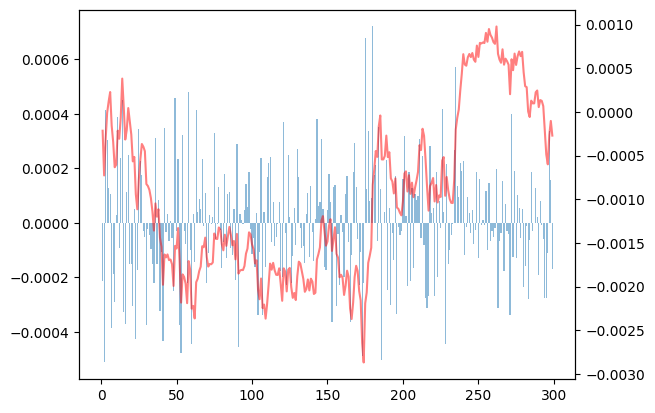

In [4]:
fig,ax1 = plt.subplots()
ax1.bar(data.index,data['return'],alpha=0.5,label='return')
ax2 = ax1.twinx()
ax2.plot(data.index,data['cumulative_return'],color='red',alpha=0.5,label='Cumulative_return')


In [5]:
from scipy.stats import gaussian_kde

In [6]:
loss = -data['return']
alpha = 0.95
VaR = np.quantile(loss,alpha)
ES = loss[loss >= VaR].mean()

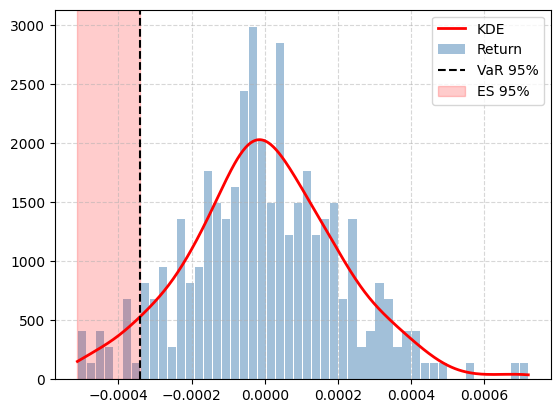

In [7]:
x = np.linspace(data['return'].min(),data['return'].max(),500)
kde = gaussian_kde(data['return'])

plt.plot(x,kde(x),color='red',linewidth=2,label="KDE")
plt.hist(data['return'],bins=50,density=True,alpha=0.5,color='steelblue',rwidth=0.9,label='Return')
plt.axvline(-VaR, color='black', linestyle='--', label='VaR 95%')
plt.axvspan(data['return'].min(), -VaR, color='red', alpha=0.2, label='ES 95%')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

In [8]:
import talib as t
data['fast'] = data['Close'].rolling(window=5).mean()
data['slow'] = data['Close'].rolling(window=15).mean()
data['atr'] = t.ATR(data['High'],data['Low'],data['Close'],14)
data['gap'] = data['fast'] - data['slow']

<Axes: >

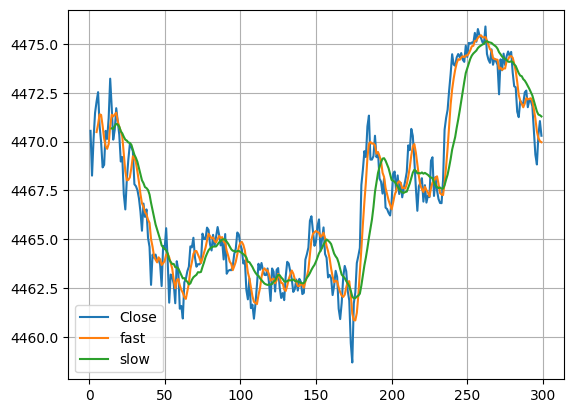

In [9]:
data['Close'].plot(legend=True,grid=True)
data['fast'].plot(legend=True,grid=True)
data['slow'].plot(legend=True,grid=True)

In [10]:
data['gap_atr'] = data['gap'] / data['atr']

<Axes: >

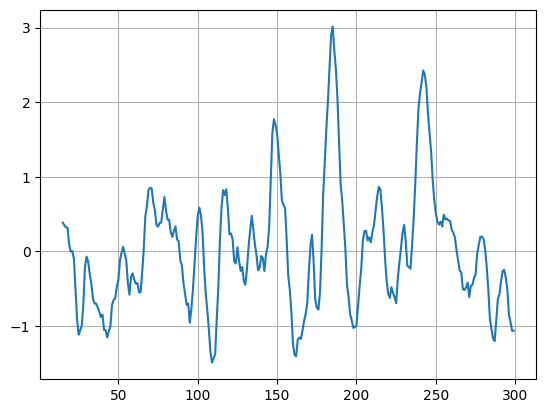

In [11]:
data['gap_atr'].plot(grid=True)

In [12]:
def logistic(z,k=1.0):
    return 1 / (1 + np.exp(-k * z))

In [13]:
prob = logistic(data['gap_atr'],k=10)

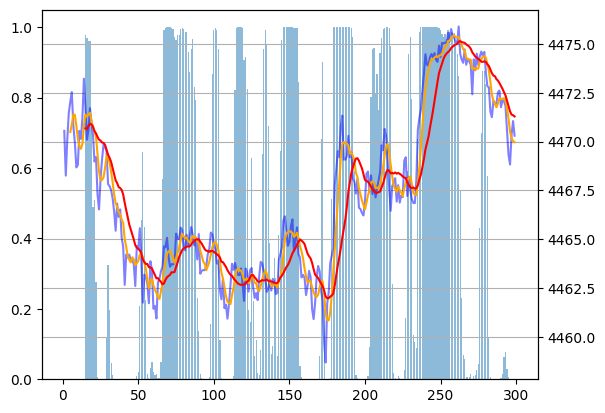

In [14]:
fig,ax1 = plt.subplots()

ax1.bar(prob.index,prob,alpha=0.5)
ax2 = ax1.twinx()
ax2.plot(data.index,data['Close'],alpha=0.5,color='blue')
ax2.plot(data.index,data['fast'],color='orange')
ax2.plot(data.index,data['slow'],color='red')
plt.grid()

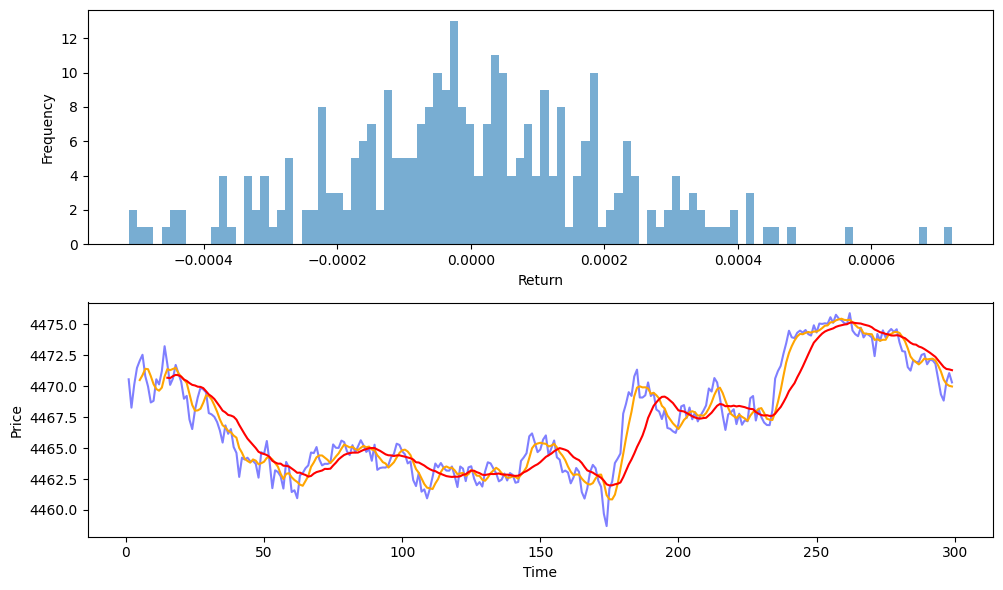

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,6))

# 上：收益率分布
ax1.hist(data['return'], bins=100, alpha=0.6)
ax1.set_xlabel('Return')
ax1.set_ylabel('Frequency')

# 下：价格 + EMA
ax2.plot(data.index, data['Close'], alpha=0.5, color='blue')
ax2.plot(data.index, data['fast'], color='orange')
ax2.plot(data.index, data['slow'], color='red')
ax2.set_xlabel('Time')
ax2.set_ylabel('Price')

plt.tight_layout()
plt.show()